In [25]:
import numpy as np
import pandas as pd

# Load original dataset
- dataset can be obtained from https://www.kaggle.com/datasets/thedevastator/1-5-million-beer-reviews-from-beer-advocate
- to recreate the processed dataset, put `beer_reviews.csv` in `./data/` folder

In [ ]:
DATA_FOLDER = "./data/"

ratings = pd.read_csv(DATA_FOLDER + "beer_reviews.csv")

ratings.head()

In [28]:
ratings.columns

Index(['index', 'brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')

- rename `beer_beerid` to `item_id`
- we use `review_overall` as target (new column name: `rating`)

In [29]:
ratings.columns = ['index', 'brewery_id', 'brewery_name', 'timestamp', 'rating',
       'review_aroma', 'review_appearance', 'userId', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'item_id']

In [30]:
ratings["datetime"] = pd.to_datetime(ratings["timestamp"], unit = "s")

In [31]:
ratings.sort_values(["userId","timestamp"], inplace=True)
ratings

,index,brewery_id,brewery_name,timestamp,rating,review_aroma,review_appearance,userId,beer_style,review_palate,review_taste,beer_name,beer_abv,item_id,datetime
614509,614509,199,Ballast Point Brewing Company,1205561385,5.0,4.0,3.5,0110x011,American Double / Imperial IPA,4.0,4.0,Dorado Double IPA,9.6,10386,2008-03-15 06:09:45
182729,182729,396,AleSmith Brewing Company,1205823873,5.0,5.0,4.0,0110x011,American Double / Imperial IPA,4.5,4.5,YuleSmith (Summer),8.5,7284,2008-03-18 07:04:33
1134674,1134674,863,Russian River Brewing Company,1207011338,5.0,5.0,5.0,0110x011,American Double / Imperial IPA,4.5,4.5,Pliny The Elder,8.0,7971,2008-04-01 00:55:38
462893,462893,559,Speakeasy Ales & Lagers,1207362193,4.5,4.0,4.0,0110x011,American Double / Imperial IPA,3.5,4.0,Double Daddy Imperial India Pale Ale,9.5,25283,2008-04-05 02:23:13
886485,886485,147,Stone Brewing Co.,1208211124,5.0,5.0,4.0,0110x011,American Black Ale,4.0,5.0,Stone Sublimely Self-Righteous Ale,8.7,38470,2008-04-14 22:12:04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186396,1186396,10099,Dogfish Head Brewery,1253919442,3.0,4.0,4.5,NaN,Pumpkin Ale,4.0,3.0,Punkin Ale,7.0,6260,2009-09-25 22:57:22
639093,639093,30,Avery Brewing Company,1254086555,4.5,4.5,5.0,NaN,American Barleywine,5.0,4.5,Hog Heaven Barley Wine,9.2,1490,2009-09-27 21:22:35
957038,957038,193,Anderson Valley Brewing Company,1254112073,3.0,4.0,4.5,NaN,Dubbel,3.0,3.0,Brother David's Belgian-style Double Ale,9.0,4168,2009-09-28 04:27:53
271748,271748,68,Flying Dog Brewery,1254265224,4.0,3.5,4.0,NaN,Baltic Porter,4.0,3.5,Gonzo Imperial Porter,9.2,24071,2009-09-29 23:00:24


In [32]:
ratings.dropna(inplace=True)
ratings.shape

(1518478, 15)

In [33]:
ratings["sessionId"] = 1

<AxesSubplot:xlabel='datetime', ylabel='Count'>

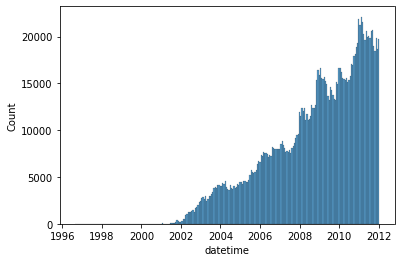

In [34]:
import seaborn as sns
sns.histplot(ratings["datetime"])

### Limit to only recent data (2008+)

In [35]:
ratings_recent = ratings.loc[ratings["datetime"] >= np.datetime64('2008', 'Y')]
ratings_recent.shape

(1037331, 16)

In [36]:
len(ratings_recent.item_id.unique()),len(ratings_recent.userId.unique())

(39705, 26122)

In [43]:
ratings_recent["rating"].value_counts()

4.0    392460
4.5    216380
3.5    197561
3.0    101692
5.0     58960
2.5     34187
2.0     22549
1.5      7228
1.0      6314
Name: rating, dtype: int64

## Data binarization
- ratings < 2.5 are negative (-1), ratings > 3.5 are positive (+1); remove middle ones
- for testing, identify user-session pairs where there is at least three positive and three negative rating

In [44]:
df = ratings_recent.loc[~((ratings_recent.rating >=2.5)&(ratings_recent.rating <=3.5)) ]
df.shape

(703891, 16)

In [45]:
df.loc[df.rating <2.5,"rating"] = -1
df.loc[df.rating >3.5,"rating"] = 1
df

,index,brewery_id,brewery_name,timestamp,rating,review_aroma,review_appearance,userId,beer_style,review_palate,review_taste,beer_name,beer_abv,item_id,datetime,sessionId
614509,614509,199,Ballast Point Brewing Company,1205561385,1.0,4.0,3.5,0110x011,American Double / Imperial IPA,4.0,4.0,Dorado Double IPA,9.6,10386,2008-03-15 06:09:45,1
182729,182729,396,AleSmith Brewing Company,1205823873,1.0,5.0,4.0,0110x011,American Double / Imperial IPA,4.5,4.5,YuleSmith (Summer),8.5,7284,2008-03-18 07:04:33,1
1134674,1134674,863,Russian River Brewing Company,1207011338,1.0,5.0,5.0,0110x011,American Double / Imperial IPA,4.5,4.5,Pliny The Elder,8.0,7971,2008-04-01 00:55:38,1
462893,462893,559,Speakeasy Ales & Lagers,1207362193,1.0,4.0,4.0,0110x011,American Double / Imperial IPA,3.5,4.0,Double Daddy Imperial India Pale Ale,9.5,25283,2008-04-05 02:23:13,1
886485,886485,147,Stone Brewing Co.,1208211124,1.0,5.0,4.0,0110x011,American Black Ale,4.0,5.0,Stone Sublimely Self-Righteous Ale,8.7,38470,2008-04-14 22:12:04,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521081,521081,113,Samuel Smith Old Brewery (Tadcaster),1237681606,1.0,4.5,4.5,zythus,English Porter,5.0,5.0,"Samuel Smith's, The Famous Taddy Porter",5.0,572,2009-03-22 00:26:46,1
520548,520548,113,Samuel Smith Old Brewery (Tadcaster),1242257696,1.0,5.0,5.0,zythus,Euro Pale Lager,5.0,5.0,Samuel Smith's Pure Brewed Lager Beer,5.0,574,2009-05-13 23:34:56,1
516121,516121,113,Samuel Smith Old Brewery (Tadcaster),1243812668,1.0,4.0,4.5,zythus,English Brown Ale,5.0,4.5,Samuel Smith's Nut Brown Ale,5.0,576,2009-05-31 23:31:08,1
1486864,1486864,23980,Yuengling Brewery,1267120909,1.0,4.0,4.0,zythus,Bock,4.5,4.0,Yuengling Bock,5.1,47812,2010-02-25 18:01:49,1


In [48]:
# create a user_session identifier
df = df.copy()
df['user_session_id'] = (df['userId'].astype(str) + '_' + df['sessionId'].astype(str)).map(hash)
df = df.sort_values(by=['user_session_id', 'timestamp'])

### Define sessions suitable for testing

In [49]:
testable_sessions = df.groupby('user_session_id').agg({"userId": "first", "rating": "count"}).rename(columns={"rating": "ratingsCount"}).reset_index()
testable_sessions["positiveCount"] = 0
positive_counts = df[df.rating == 1.].groupby('user_session_id').rating.count()
testable_sessions.loc[testable_sessions["user_session_id"].isin(positive_counts.index) ,"positiveCount"] = testable_sessions.loc[testable_sessions["user_session_id"].isin(positive_counts.index) ,"user_session_id"].apply(lambda x: positive_counts[x])
testable_sessions["negativeCount"] = testable_sessions["ratingsCount"] - testable_sessions["positiveCount"]

testable_sessions

,user_session_id,userId,ratingsCount,positiveCount,negativeCount
0,-9222456218377594362,dar,2,2,0
1,-9222111084529926888,ilovebeer87,1,1,0
2,-9221647761758577902,Fumanchu,2,0,2
3,-9221252665630398758,FOUR,1,1,0
4,-9218656366780857531,beer272,4,2,2
...,...,...,...,...,...
24569,9216373971264961225,GeoffM,5,4,1
24570,9218236034698153768,rkcrozier,21,19,2
24571,9220180988011087723,Neilio,4,4,0
24572,9220826127680984748,goldbot,191,186,5


In [50]:
print(len(testable_sessions))
# we need at least 3 positive interactions and 3 negative interactions
testable_sessions = testable_sessions[(testable_sessions.positiveCount >= 3) & (testable_sessions.negativeCount >= 3)]
print(len(testable_sessions))

24574
2517


### Distinguish between validation and test sessions

In [51]:
# shuffle rows
testable_sessions = testable_sessions.sample(frac=1).reset_index(drop=True)
# add sessions randomly to validation set (0) or one of five CV splits (1-5)
testable_sessions["split"] = testable_sessions.index.values

split_number_to_string = {
    0: "val",  # 25% of sessions are validation
    1: "test",
    2: "test",
    3: "test",
}

testable_sessions["split"] = testable_sessions["split"].apply(lambda x: x % 4).apply(lambda x: split_number_to_string[x])

In [52]:
testable_sessions

,user_session_id,userId,ratingsCount,positiveCount,negativeCount,split
0,3792126474534330877,GregBlatz,33,28,5,val
1,-7403818263409007646,Winter,52,49,3,test
2,-2981323566780036922,seanyfo,218,199,19,test
3,-9117412212541303084,rehabis4quitters,23,17,6,test
4,-400237801980422869,hardy008,476,399,77,val
...,...,...,...,...,...,...
2512,-9015703250934782857,Soonami,269,256,13,val
2513,8581335531649775012,goochpunch,39,27,12,test
2514,5695235979943129876,dakid618,80,76,4,test
2515,-2630324192110008358,Gtreid,283,269,14,test


In [53]:
# check if every row is a unique user session
assert len(testable_sessions) == testable_sessions.user_session_id.nunique()

In [54]:
for split in ["train", "val", "test"]:
    print(f"number of testable sessions in split {split}: {len(testable_sessions[testable_sessions.split == split])}")

number of testable sessions in split train: 0
number of testable sessions in split val: 630
number of testable sessions in split test: 1887


In [55]:
# map user_session_id to split
user_session_id_to_split = {usid: split for usid, split in zip(testable_sessions.user_session_id.values, testable_sessions.split.values)}

In [56]:
# assign dataframe entries to split
df["split"] = df["user_session_id"].apply(lambda x: user_session_id_to_split.get(x, "train"))

## Downsample the training data

In [57]:
train_df = df[df.split == "train"]
eval_df = df[df.split != "train"]

# to simulate real-world data sparsity, we subsample rows of train df in a stratified manner (per item)
# we modify the long-tail distribution to make it sparser
# set count x of every item to x**(2/3)
# max count will be 100, and the distribution will be long tailed
print(train_df.item_id.value_counts().describe())
train_df = train_df.groupby('item_id', group_keys=False).apply(
    lambda x: x.sample(
        min(
            round(len(x)**(2/3)), # at most this number
            100,  # at most 100
        ),
    )
)
print(train_df.item_id.value_counts().describe())
# in training split, keep only interactions with (positive) rating 1
train_df = train_df[train_df.rating == 1.]

df = pd.concat([train_df, eval_df])

count    17707.000000
mean        13.555938
std         47.063999
min          1.000000
25%          1.000000
50%          2.000000
75%          7.000000
max       1251.000000
Name: item_id, dtype: float64
count    17707.000000
mean         4.047495
std          6.845939
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max        100.000000
Name: item_id, dtype: float64


In [61]:
df.shape

(532928, 18)

In [62]:
df.groupby("split")[["index"]].count()

,index
split,
test,338681
train,69072
val,125175


## Save processed dataset

In [59]:
df.to_csv(DATA_FOLDER + "ratings_processed_BeerAdvocate.csv", index=False)